In [11]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

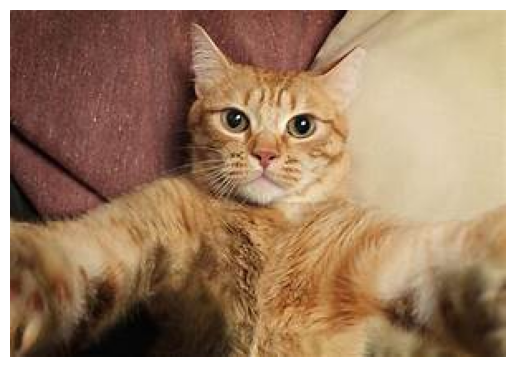

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image


# importando la imágen a array

img = Image.open('raw-img/gatto/1.jpeg')


# Representando con matplotlib
def mostrar_imagen(imagen):
    plt.imshow(imagen, cmap='gray')
    plt.axis('off')
    plt.show()
    

mostrar_imagen(img)

In [29]:
BASE_DIR = Path().cwd()

IMG_DIRECTORY = BASE_DIR / 'raw-img'


animales = dict()

for animal in os.listdir(IMG_DIRECTORY):
    rutas = list((IMG_DIRECTORY / animal).iterdir())
    animales[animal] = rutas
    

In [30]:
animales


{'mucca': [PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/mucca/OIP-YgUPGYR0bpPTcacgXUxrSgHaFK.jpeg'),
  PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/mucca/OIP-LO2VoErJp3ns7-v00powbAHaEo.jpeg'),
  PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/mucca/OIP-7cHoY3UYsCZQKyHzlnFOqgHaFj.jpeg'),
  PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/mucca/OIP-2S1aXxRySVIbHTSoGbrkIQHaFj.jpeg'),
  PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/mucca/OIP-1irfBSzjuW_IKzpr03VkegHaFH.jpeg'),
  PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/mucca/OIP-jokPwBO633xLSvqZ9izkwQHaF0.jpeg'),
  PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/mucca/OIP-5y9K0LVUK0k79DL29hwEGwHaE9.jpeg'),
  PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/mucca/OIP-cBDHc-GRjx_iMoAWabBCwwHaGa.jpeg'),
  PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/

In [35]:

animales_show = {}

for animal in os.listdir(IMG_DIRECTORY):
    # toma solo la primera imagen encontrada en cada carpeta
    imagenes = list((IMG_DIRECTORY / animal).iterdir())
    if imagenes:
        animales_show[animal] = imagenes[0]

In [37]:
print(animales['gatto'])         # debe mostrar una sola ruta
print(type(animales['gatto']))  # debe ser <class 'pathlib.PosixPath'>


[PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/gatto/1029.jpeg'), PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/gatto/1637.jpeg'), PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/gatto/774.jpeg'), PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/gatto/1727.jpeg'), PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/gatto/923.jpeg'), PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/gatto/30.jpeg'), PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/gatto/166.jpeg'), PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/gatto/648.jpeg'), PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/gatto/991.jpeg'), PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/gatto/644.jpeg'), PosixPath('/mnt/wd1tb/proyectos_remotos/animal_clasificacion/raw-img/gatto/ea37b60a2ef4073ed1584d05fb1d4e9fe777ead218ac104497f5

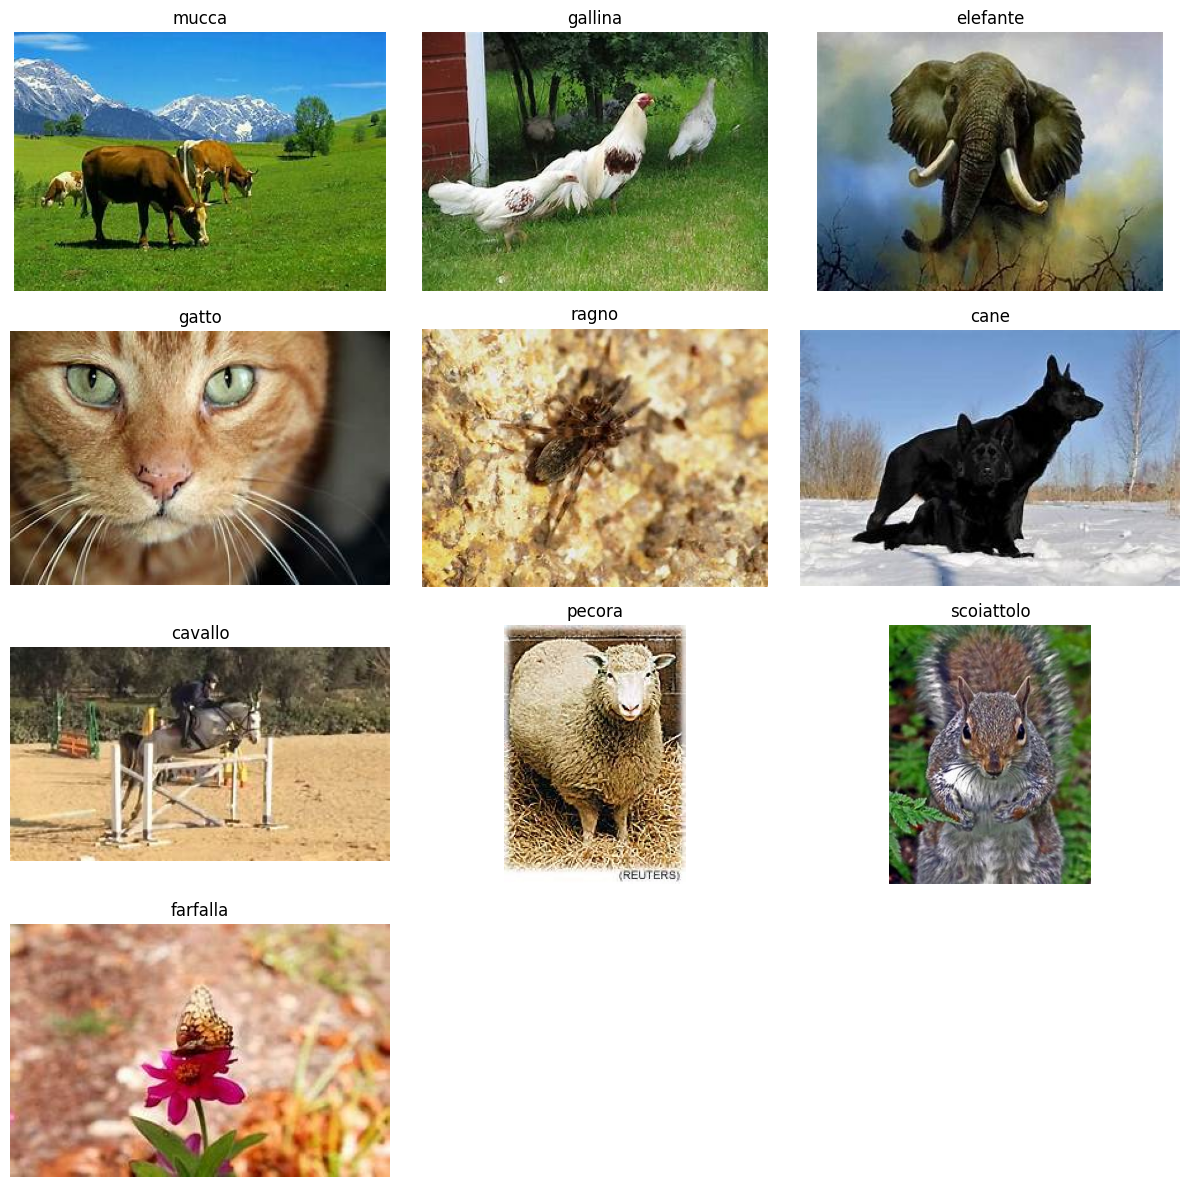

In [ ]:
n_animales = len(animales_show)


fig, axes = plt.subplots(4, 3, figsize=(12, 12))  


axes = axes.flatten()

for i, (nombre, ruta) in enumerate(animales_show.items()):
    if i >= 10:
        break  # solo mostramos hasta 9 imágenes
    img = Image.open(ruta)
    
    axes[i].imshow(img)
    axes[i].set_title(nombre, fontsize=12)
    axes[i].axis('off')
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


data_dir = 'raw-img'

dataset = image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    suffle=True
)